In [169]:
import numpy as np

def findNullSpace(A):
    # Compute the SVD of A
    U, S, Vt = np.linalg.svd(A)

    # Find the null space of A
    null_space = Vt.T[:, S.size:]

    # Choose a non-trivial vector from the null space
    non_trivial_solution = null_space[:, 0]
    return non_trivial_solution
    # return Vt[-1]




def caratheodory(P, w):
    assert len(P) == len(w)
    n, d = P.shape
    if n <= d + 1:
        return P, w
    weigtedSumOfPoints = np.dot(w, P)
    # Compute the matrix M (each column is pi - p1)
    M = (P[1:] - P[0]).T  # shape (d, n-1)

    # Perform SVD on M
#     U, S, Vt = np.linalg.svd(M, full_matrices=False)
    
#     # The smallest singular value is the last one in S, and its corresponding vector is the last row of Vt
#     v = Vt[-1]
#     # 6 Compute v = (v2, · · · , vn)
# # T 6= 0 such that Av = 0.
#     # confirm this step
#     print("M : ", M)
#     print("v : ", v)
#     print("Av : ", np.dot(M, v)) 
    v= findNullSpace(M)   

    # print("v : ", v )
    # Include v1, which is the negative sum of the other entries in v
    v1 = -np.sum(v)
    v = np.insert(v, 0, v1)
    
    # Calculate alpha
    alpha = np.inf
    for i in range(n):
        if v[i] > 0:
            alpha = min(alpha, w[i] / v[i])
    
    # Calculate new weights u
    u = w - alpha * v
    # print("u : ", u)
    # Ensure u is non-negative
    assert np.all(u >= -0.0000001)
    # Filter points with positive weights
    S = P[u > 0]
    u = u[u > 0]
    # calculate weighted sum of points in S
    weightedSumOfPoints2 = np.dot(u, S)
    # print (S.shape, u.shape)
    # print("S : ", S)
    # print("u : ", u)
    # print("weigtedSumOfPoints : ", weightedSumOfPoints2)
    assert np.allclose(weigtedSumOfPoints, weightedSumOfPoints2)

    # print (S, u)
    
    if len(S) > d + 1:
        return caratheodory(S, u)  # Recursive call if needed
    return S, u


In [170]:
def transformMatrix(A):
    return np.vstack([np.outer(r, r).flatten() for r in A])



100%|██████████| 197/197 [49:25<00:00, 15.05s/it]


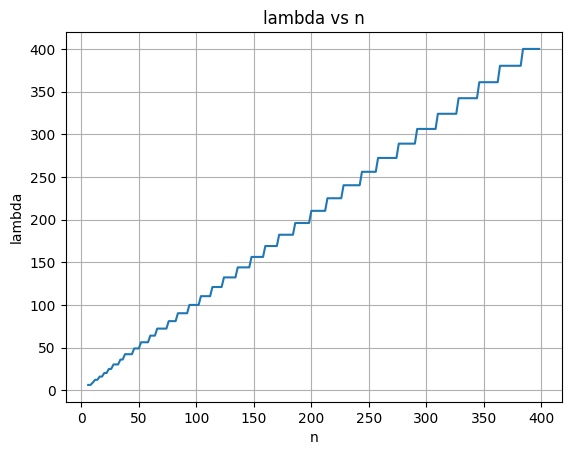

In [207]:
d=3
import tqdm as tqdm
Id=np.eye(d)
# print(I3)
# create A matrix by stacking k copies of I3 with another column of 0s
def A_matrix(k):
    A = np.zeros((d*k, d+1))
    for i in range(k):
        A[d*i:d*(i+1), 0:d] = Id
    return A


# k=10
lambdas={}
# use tqdm to show progress bar
for k in tqdm.tqdm(range(3,200)):
    # print(A_matrix(10))
    C=A_matrix(k)



    weigts=np.ones(d*k)

    weigts=weigts/np.sum(weigts)

    # priont



    #  experiment with different values of c to see how the caratheodory representation changes
    for c in range(1,200):
        # multiply the last 3 rows of B by c
        # c=c/10
        B=C.copy()
        B[-d:]*=c/2
        # transform B to get the caratheodory representation
        D=transformMatrix(B)
        # print weighted sum of the rows of D usignt the weights arrray


        # drop all the zero columns from D
        D=D[:,~np.all(D == 0, axis=0)]
        

        weigtedSum=np.sum(D*weigts[:,None],axis=0)
        # print("ininial vector sum" , weigtedSum)
        S, u = caratheodory(D, weigts)
        # print(S)
        # print("sum of weights",np.sum(u))
        #  check if there are more than d points in the caratheodory representation with non 1 values in thier rows
        flag=False
        # print(S)
        # print("the last value of c is",c, "past values are :","{:.2f}".format(c-1))
        # for i in range(len(S)):
        #     if np.sum(S[i])!=1:
        #         print(c)
        #         flag=True
        #         break
        # check if the count of rows with non 1 values is equal to d
        sum_rows=np.sum(S!=1,axis=1)
        # print(u)
        # weigted sum of the rows of S
        weigtedSum=np.sum(S*u[:,None],axis=0)
        # print("Final vector sum" ,weigtedSum)
        if np.sum(sum_rows==d)==d:
            # print(D, weigts)
            # print(S, u)
            # print("found for value of c",c)
            lambdas[k]=(c**2)/4
            break
        else:
            # print("not found for value of c",c)
            pass

        if flag:
            break



# graph lambdas vs n=k*3
import matplotlib.pyplot as plt
n=[3*i for i in lambdas.keys()]
l=[lambdas[i] for i in lambdas.keys()]
plt.plot(n,l)
plt.grid()

plt.xlabel("n")
plt.ylabel("lambda")
plt.title("lambda vs n")
plt.show()

 


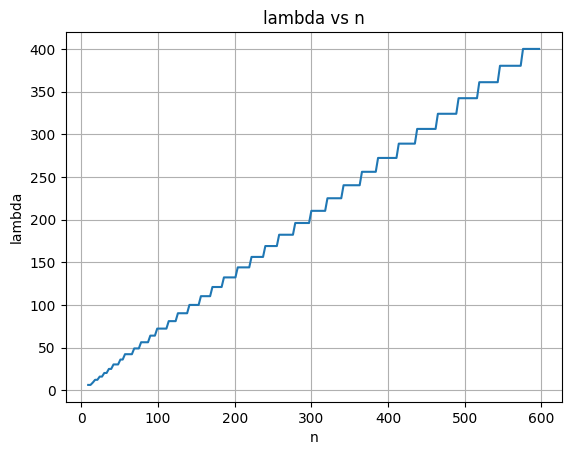

In [208]:
import matplotlib.pyplot as plt
n=[3*i for i in lambdas.keys()]
l=[lambdas[i] for i in lambdas.keys()]
plt.plot(n,l)
plt.grid()

plt.xlabel("n")
plt.ylabel("lambda")
plt.title("lambda vs n")
plt.show()



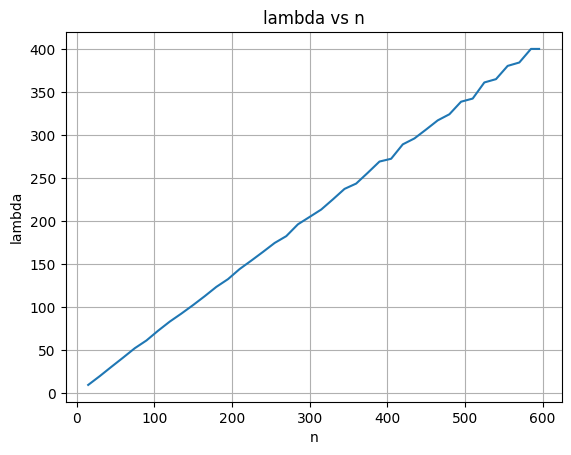

In [216]:
import matplotlib.pyplot as plt
n=[3*i for i in lambdas.keys()]
l=[lambdas[i] for i in lambdas.keys()]
n=np.array(n)
l=np.array(l)

n_f=5
smoothed_n=[ n[i:i+n_f].mean() for i in range(0,len(n),n_f)]
smoothed_l=[ l[i:i+n_f].mean() for i in range(0,len(l),n_f)]
plt.plot(smoothed_n,smoothed_l)
plt.grid()

plt.xlabel("n")
plt.ylabel("lambda")
plt.title("lambda vs n")
plt.show()


In [209]:
# save the dictionary to a file
import pickle
with open('lambdas.pkl', 'wb') as f:
    pickle.dump(lambdas, f)

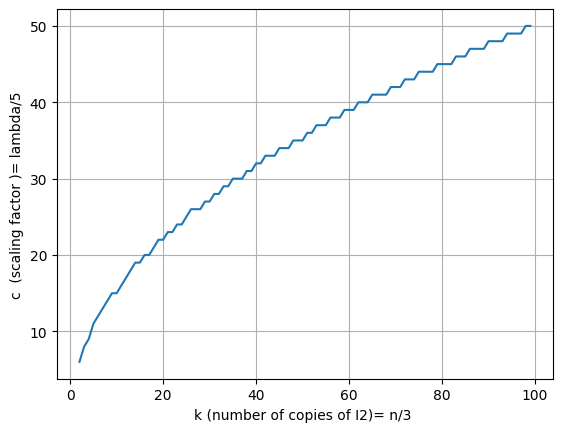

In [203]:
import matplotlib.pyplot as plt
plt.plot(list(k_vs_c.keys()), list(k_vs_c.values()))
plt.xlabel('k (number of copies of I2)= n/3 ')
plt.ylabel('c  (scaling factor )= lambda/5')
plt.grid()
plt.show()



{2: 6, 3: 8, 4: 9, 5: 11, 6: 12, 7: 13, 8: 14, 9: 15, 10: 15, 11: 16, 12: 17, 13: 18, 14: 19, 15: 19, 16: 20, 17: 20, 18: 21, 19: 22, 20: 22, 21: 23, 22: 23, 23: 24, 24: 24, 25: 25, 26: 26, 27: 26, 28: 26, 29: 27, 30: 27, 31: 28, 32: 28, 33: 29, 34: 29, 35: 30, 36: 30, 37: 30, 38: 31, 39: 31, 40: 32, 41: 32, 42: 33, 43: 33, 44: 33, 45: 34, 46: 34, 47: 34, 48: 35, 49: 35, 50: 35, 51: 36, 52: 36, 53: 37, 54: 37, 55: 37, 56: 38, 57: 38, 58: 38, 59: 39, 60: 39, 61: 39, 62: 40, 63: 40, 64: 40, 65: 41, 66: 41, 67: 41, 68: 41, 69: 42, 70: 42, 71: 42, 72: 43, 73: 43, 74: 43, 75: 44, 76: 44, 77: 44, 78: 44, 79: 45, 80: 45, 81: 45, 82: 45, 83: 46, 84: 46, 85: 46, 86: 47, 87: 47, 88: 47, 89: 47, 90: 48, 91: 48, 92: 48, 93: 48, 94: 49, 95: 49, 96: 49, 97: 49, 98: 50, 99: 50}


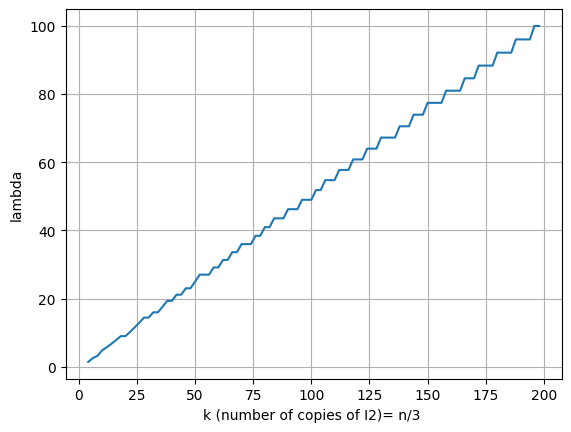

In [205]:
print(k_vs_c)
# I multiplied last digits by c/5 and saved c so root lambda is c/5 ,i.e k_vs_c[c]/5=root(lambda) thus lambda=(k_vs_c[c]/5)^2
lambdas={c:(k_vs_c[c]/5)**2 for c in k_vs_c}
# graph lambdas vs n
lambdas=[lambdas[c] for c in k_vs_c]
# n= 2k
n=[2*k for k in k_vs_c]
plt.plot(n, lambdas)
plt.xlabel('k (number of copies of I2)= n/3 ')
plt.ylabel('lambda')
plt.grid()
plt.show()


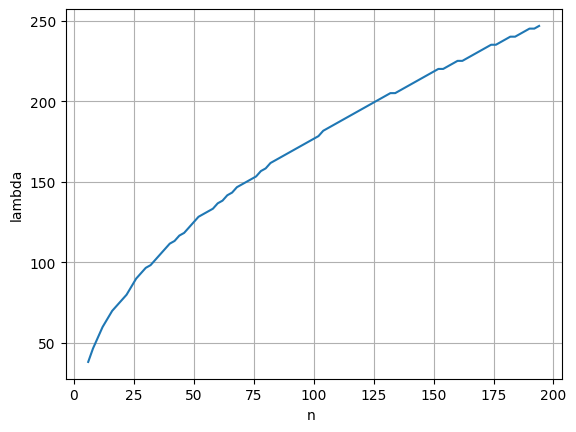

In [202]:
# import matplotlib.pyplot as plt
# plt.plot(list(k_vs_c.keys()), list(k_vs_c.values()))
# plt.xlabel('k (number of copies of I3) n/3 ')
# plt.ylabel('c  (scaling factor =lambda/5)')

# plt.grid()
# plt.show()


# graph n vs lambda
n=[2*k for k in k_vs_c.keys()]
lambda_values=[5*c for c in k_vs_c.values()]
# smoothen the values
smoothingFactor=3
lambda_values=[np.mean(lambda_values[i:i+smoothingFactor]) for i in range(len(lambda_values)-smoothingFactor)]
n=[np.mean(n[i:i+smoothingFactor]) for i in range(len(n)-smoothingFactor)]


plt.plot(n, lambda_values)
plt.xlabel('n ')
plt.ylabel('lambda')
# smoothen the graph

plt.grid()
plt.show()


In [193]:
# last example of the caratheodory representation
# print(D)
# print(weigts)
print("Sum of weights",np.sum(weigts))
print("weigtedSum of D =",np.sum(D*weigts[:,None],axis=0))    
S, u = caratheodory(D, weigts)
print("Sum of weights of D",np.sum(u))   
weigtedSum=("weigtedSum of S = ",np.sum(S*u[:,None],axis=0))

print(S)
print(*weigtedSum)
print("Sum of weights",np.sum(u))


Sum of weights 1.0
weigtedSum of D = [1. 1.]
Sum of weights of D 1.0000000000000007
[[  1.   0.]
 [100.   0.]
 [  0. 100.]]
weigtedSum of S =  [1. 1.]
Sum of weights 1.0000000000000007
